#Image Feature Extraction
Image feature extraction is the process of extracting meaningful information from images, such as shapes, colors, textures, edges, etc. It can be used for various applications, such as object recognition, face detection, image segmentation, etc.

**Grayscale Pixel Values as Features**: The simplest way to create features from an image is to use these raw pixel values as separate features. This involves converting the image to grayscale and flattening it into a one-dimensional array2.


**Mean Pixel Value of Channels**: Another way to create features from an image is to use the mean pixel value of each color channel (red, green, and blue) as separate features. This involves reading the image in color mode and computing the mean of each channel2.


**Extracting Edge Features**: A more advanced way to create features from an image is to use edge detection techniques to extract edge features. This involves applying filters such as Sobel, Canny, or Prewitt to detect the edges in an image and then using them as features2.
These are just some of the techniques to extract features from images using Python. There are many more methods that you can explore using scikit-image or other libraries such as OpenCV or PIL.

In [ ]:
#loading All dependencies
import numpy as np
import pandas as pd
import cv2 as cv
import skimage as sk
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from skimage.io import imread, imshow
#Mounting Google Drive to read files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(284, 353, 3)


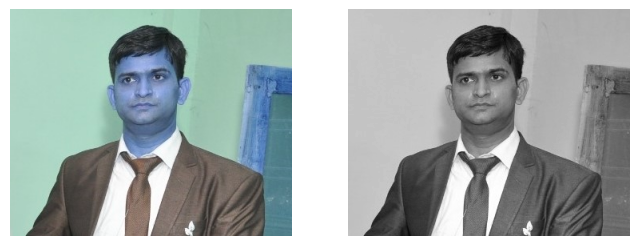

In [ ]:
# Features from pixel values
#read image from google drive
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/atul.jpg')
print(img.shape)

#convert to grayscale
def rgb2gray(rgb):
# using some caliberated weights
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
#def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gimg = rgb2gray(img)
#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(img)
axes[0].axis('off')
axes[1].imshow(gimg, cmap=plt.cm.gray)
axes[1].axis('off')

#checking image shape
gimg.shape, gimg
sha=gimg.shape
# Features for for grayscale image
featuresg = np.reshape(gimg, (284*353))
# Features for colored image
featuresc = np.reshape(img, (284*353*3))



#Statistical Features of Images

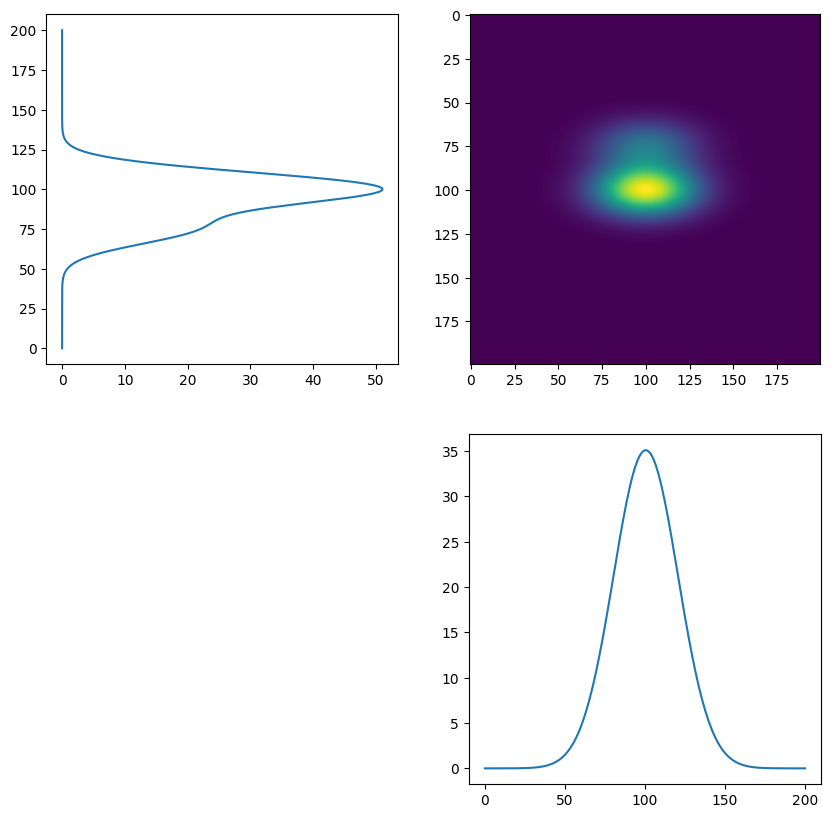

In [ ]:
import time

plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax4 = plt.subplot(224)

#Make some sample data as a sum of two elliptical gaussians:
x = range(200)
y = range(200)

X,Y = np.meshgrid(x,y)

def twoD_gaussian(X,Y,A=1,xo=100,yo=100,sx=20,sy=10):
    return A*np.exp(-(X-xo)**2/(2.*sx**2)-(Y-yo)**2/(2.*sy**2))

Z = twoD_gaussian(X,Y) + twoD_gaussian(X,Y,A=0.4,yo=75)

ax2.imshow(Z) #plot it

#calculate projections along the x and y axes for the plots
yp = np.sum(Z,axis=1)
xp = np.sum(Z,axis=0)

ax1.plot(yp,np.linspace(0,len(yp),len(yp)))
ax4.plot(np.linspace(0,len(xp),len(xp)),xp)

#Here is the business:
def image_statistics(Z):
    #Input: Z, a 2D array, hopefully containing some sort of peak
    #Output: cx,cy,sx,sy,skx,sky,kx,ky
    #cx and cy are the coordinates of the centroid
    #sx and sy are the stardard deviation in the x and y directions
    #skx and sky are the skewness in the x and y directions
    #kx and ky are the Kurtosis in the x and y directions
    #Note: this is not the excess kurtosis. For a normal distribution
    #you expect the kurtosis will be 3.0. Just subtract 3 to get the
    #excess kurtosis.
    import numpy as np

    h,w = np.shape(Z)

    x = range(w)
    y = range(h)


    #calculate projections along the x and y axes
    yp = np.sum(Z,axis=1)
    xp = np.sum(Z,axis=0)
    #centroid
    cx = np.sum(x*xp)/np.sum(xp)
    cy = np.sum(y*yp)/np.sum(yp)

    #standard deviation
    x2 = (x-cx)**2
    y2 = (y-cy)**2

    sx = np.sqrt( np.sum(x2*xp)/np.sum(xp) )
    sy = np.sqrt( np.sum(y2*yp)/np.sum(yp) )

    #skewness
    x3 = (x-cx)**3
    y3 = (y-cy)**3

    skx = np.sum(xp*x3)/(np.sum(xp) * sx**3)
    sky = np.sum(yp*y3)/(np.sum(yp) * sy**3)

    #Kurtosis
    x4 = (x-cx)**4
    y4 = (y-cy)**4
    kx = np.sum(xp*x4)/(np.sum(xp) * sx**4)
    ky = np.sum(yp*y4)/(np.sum(yp) * sy**4)


    return cx,cy,sx,sy,skx,sky,kx,ky

#We can check that the result is the same if we use the full 2D data array
def image_statistics_2D(Z):
    h,w = np.shape(Z)

    x = range(w)
    y = range(h)

    X,Y = np.meshgrid(x,y)

    #Centroid (mean)
    cx = np.sum(Z*X)/np.sum(Z)
    cy = np.sum(Z*Y)/np.sum(Z)

    ###Standard deviation
    x2 = (range(w) - cx)**2
    y2 = (range(h) - cy)**2

    X2,Y2 = np.meshgrid(x2,y2)

    #Find the variance
    vx = np.sum(Z*X2)/np.sum(Z)
    vy = np.sum(Z*Y2)/np.sum(Z)

    #SD is the sqrt of the variance
    sx,sy = np.sqrt(vx),np.sqrt(vy)

    ###Skewness
    x3 = (range(w) - cx)**3
    y3 = (range(h) - cy)**3

    X3,Y3 = np.meshgrid(x3,y3)

    #Find the third central moment
    m3x = np.sum(Z*X3)/np.sum(Z)
    m3y = np.sum(Z*Y3)/np.sum(Z)

    #Skewness is the third central moment divided by SD cubed
    skx = m3x/sx**3
    sky = m3y/sy**3

    ###Kurtosis
    x4 = (range(w) - cx)**4
    y4 = (range(h) - cy)**4

    X4,Y4 = np.meshgrid(x4,y4)

    #Find the fourth central moment
    m4x = np.sum(Z*X4)/np.sum(Z)
    m4y = np.sum(Z*Y4)/np.sum(Z)

    #Kurtosis is the fourth central moment divided by SD to the fourth power
    kx = m4x/sx**4
    ky = m4y/sy**4

    return cx,cy,sx,sy,skx,sky,kx,ky


#Calculate the image statistics using the projection method
stats_pr = image_statistics(Z)

#Confirm that they are the same by using a 2D calculation
stats_2d = image_statistics_2D(Z)

names = ('Centroid x','Centroid y','StdDev x','StdDev y','Skewness x','Skewness y','Kurtosis x','Kurtosis y')

#print 'Statistis\t1D\t2D'for name,i1,i2 in zip(names, stats_2d,stats_pr):
 #  print '%s \t%.2f \t%.2f'%(name, i1,i2)

plt.show()

## Mean value of pixels from three channels of color image


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax.get_figure().tight_layout()


IndexError: ignored

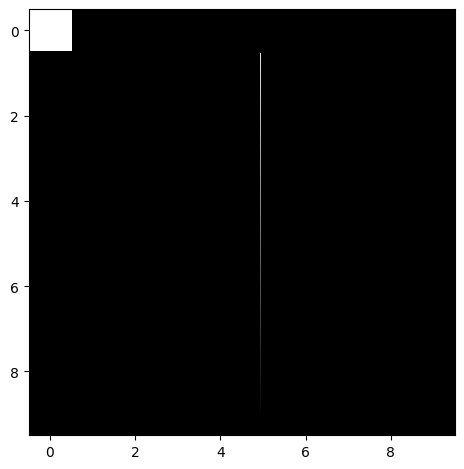

In [ ]:
feature_matrix = np.zeros((10,10))
feature_matrix.shape
for i in range(0,img.shape[0]-1):
    for j in range(0,img.shape[1]-1):
        feature_matrix[i][j] = ((int(img[i,j,0]) + int(img[i,j,1]) + int(img[i,j,2]))/3)
        imshow(feature_matrix,cmap='gray')



In [ ]:
features = np.reshape(feature_matrix, (660*450))
features.shape

## Histogram as Feature

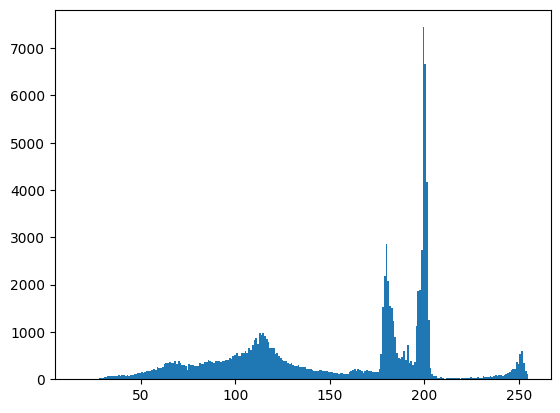

In [ ]:
# Histogram using MATPLOTLIB
ax = plt.hist(gimg.ravel(), bins = 256)
plt.show()


Text(0.5, 1.0, 'histogram of gray values')

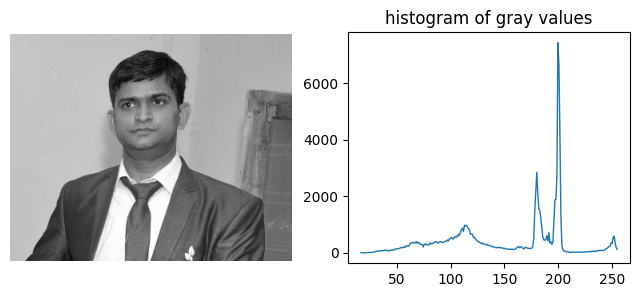

In [ ]:
from skimage.exposure import histogram
hist, hist_centers = histogram(gimg)

#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(gimg, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=1)
axes[1].set_title('histogram of gray values')

# Edge Features
Edges in an image are the corners where the pixel change drastically, as the images are stored in array form we can visualize different values and see where the change in pixel value is higher but doing it manually takes time, Scikit-Image provides functions for image edge features extraction namely:



In [ ]:
# prewitt kernel
pre_hor = sk.filters.prewitt_h(gimg)
pre_ver = sk.filters.prewitt_v(gimg)

# Sobel Kernel
ed_sobel = sk.filters.sobel(gimg)

#canny algorithm
can = sk.feature.canny(gimg)

# Farid Transform
far=sk.filters.farid(gimg)

#Roberts Filter
rob=sk.filters.roberts(gimg)

# Laplace operator
lap =sk.filters.laplace(gimg)


#imshow(pre_ver, cmap='gray');
#imshow(pre_hor, cmap='gray');
#imshow(ed_sobel, cmap='gray');
imshow(lap, cmap='gray');

## References
1.
https://github.com/rempic/Image-Features-Extraction
2.
https://analyticsindiamag.com/image-feature-extraction-using-scikit-image-a-hands-on-guide/

3.
https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

4.
https://github.com/rempic/Image-Features-Extraction